<a href="https://colab.research.google.com/github/ShaimaM/Intro_to_ML/blob/main/W3_D1_Assignment__cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Group Members:**

*   Nada Alzahrani .
*   Abeer Alghamdi .
*   Shaima Alamri .
*   Afrah Alharbi .



# Decision Tree Assignment

#### Deleverables
- EDA 
    - Tell / show me about your data
    - Etc...
- Data prep / wrangling
    - pick & prep your features
    - [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - Etc...
- Model
    - Import and make a [DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - Bonus: [GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or [RandomizedSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
    - Bonus: [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
        - Explain what's going on..
- Score your model
    - Accuracy
    - Confusion matrix
    - Etc...
- Display your decision tree with [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) (or similar)
    - Explain your tree
    - Etc...

[Data Source](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

###**Import Libraries**

In [ ]:
%%capture
# import libraries
!pip install category-encoders
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import *
sns.set_palette('Set3')

In [ ]:
# read Car csv file
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", 
                 names=["price", "maint", "doors", "persons", "lug_boot", "safety" , 'target'],)

df.head()

,price,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# Ordinally Encoded DF if needed
encoder = ce.OrdinalEncoder()
df_encode = encoder.fit_transform(df)
df_encode.head()

,price,maint,doors,persons,lug_boot,safety,target
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


####**EDA**

In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   persons   1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   target    1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [ ]:
df_encode.describe()

,price,maint,doors,persons,lug_boot,safety,target
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.417245
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.747188
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,1.750000,1.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,3.250000,3.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000


In [ ]:
df_encode.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

In [ ]:
df_encode.shape

(1728, 7)

In [ ]:
# Target Distribution after encoding
df_encode.target.value_counts()

1    1210
2     384
4      69
3      65
Name: target, dtype: int64

In [ ]:
# Target Distribution before encoding
df.target.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: target, dtype: int64

###**Visualization**

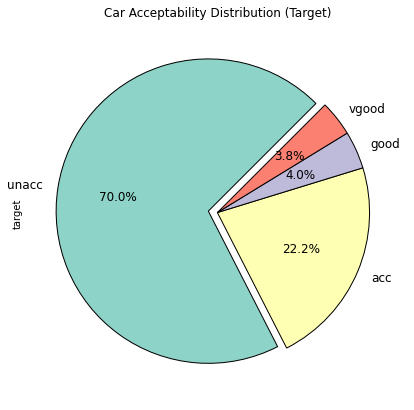

In [ ]:
# View Target Distribution
plt.figure(figsize=(7,7))
df.target.value_counts().plot.pie(explode= (0.06 , 0.0, 0.0 ,0.0), autopct='%1.1f%%', startangle=45 , textprops={'fontsize': 12} , 
   wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True}).set(title = 'Car Acceptability Distribution (Target)');

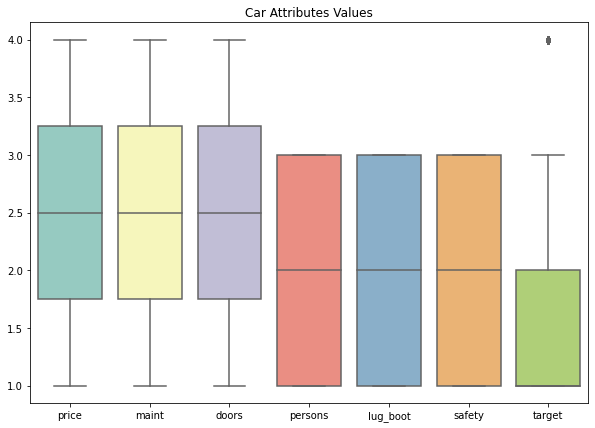

In [ ]:
#boxplot figure of dataFrame 'df_encode'
plt.figure(figsize=(10,7))
plt.title("Car Attributes Values")
sns.boxplot(data=df_encode);

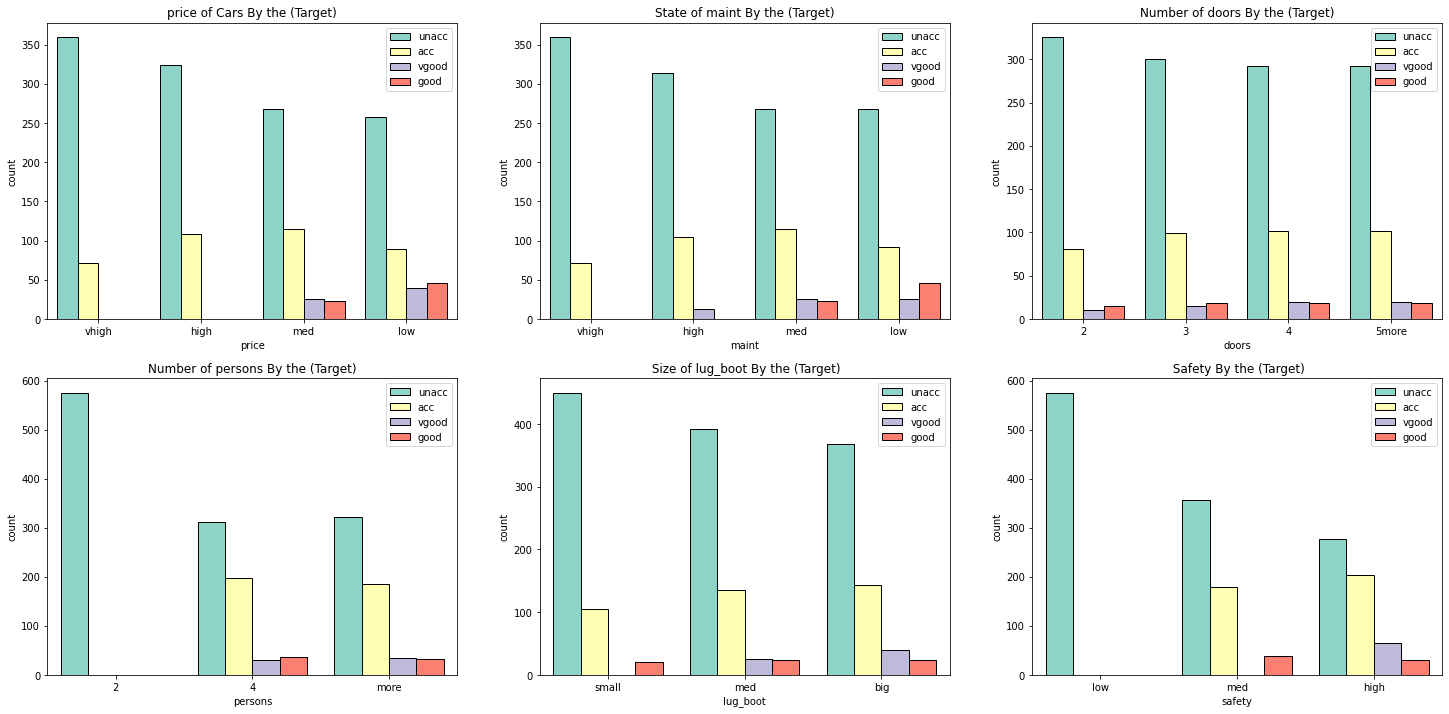

In [ ]:
# Cars infromation with target
plt.figure(figsize=(25,12))
plt.subplot(2 , 3 , 1)
sns.countplot(x = df.price , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'price of Cars By the (Target)');
plt.legend(loc='upper right');

plt.subplot(2 , 3 , 2)
sns.countplot(x = df.maint , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title='State of maint By the (Target)');
plt.legend(loc='upper right')

plt.subplot(2 , 3 , 3)
sns.countplot(x = df.doors, hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Number of doors By the (Target)');
plt.legend(loc='upper right');

plt.subplot(2 , 3 , 4)
sns.countplot(x = df.persons, hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Number of persons By the (Target)');
plt.legend(loc='upper right');

plt.subplot(2 , 3 , 5)
sns.countplot(x = df.lug_boot, hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= ' Size of lug_boot By the (Target)');
plt.legend(loc='upper right');

plt.subplot(2 , 3 , 6)
sns.countplot(x = df.safety, hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= ' Safety By the (Target)');
plt.legend(loc='upper right');

In [ ]:
corr =df_encode.corr()
corr.style.background_gradient(cmap='Blues')

,price,maint,doors,persons,lug_boot,safety,target
price,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.286532
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.254656
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.056475
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.336842
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.121453
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.402313
target,0.286532,0.254656,0.056475,0.336842,0.121453,0.402313,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


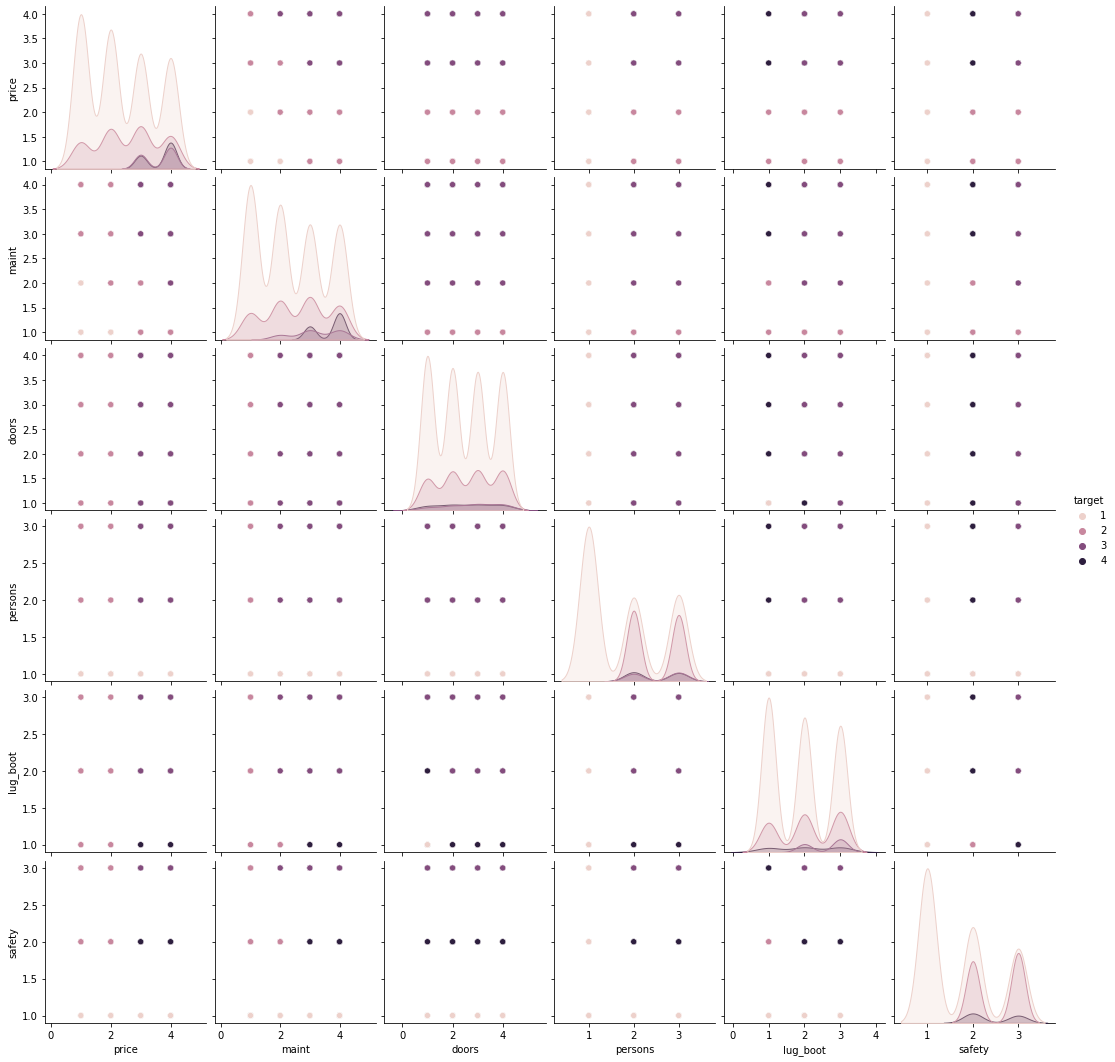

In [ ]:
# 1-> unacc
# 2-> acc
# 3-> good
# 4-> vgood
sns.pairplot(data=df_encode , hue = 'target')

#### **spilt Data**

In [ ]:
# select split parameter
x = df_encode.drop(['target'], axis=1)
y = df_encode.target

In [ ]:
# splitting into train and test sets for both parameters
x_train, x_test ,y_train , y_test = train_test_split(x,y, test_size=0.7, random_state= 42)

In [ ]:
y_train.head()

1191    1
690     1
1646    3
1616    3
689     2
Name: target, dtype: int64

###**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.feature_importances_

array([0.09756731, 0.1884247 , 0.05706724, 0.19113445, 0.12170784,
       0.34409847])

In [ ]:
preds = tree.predict(x_test)

#### **Accuracy**

In [ ]:
accuracy_score(y_test, preds)

1.0

In [ ]:
df_encode.columns

Index(['price', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'], dtype='object')

####**Plot Tree**

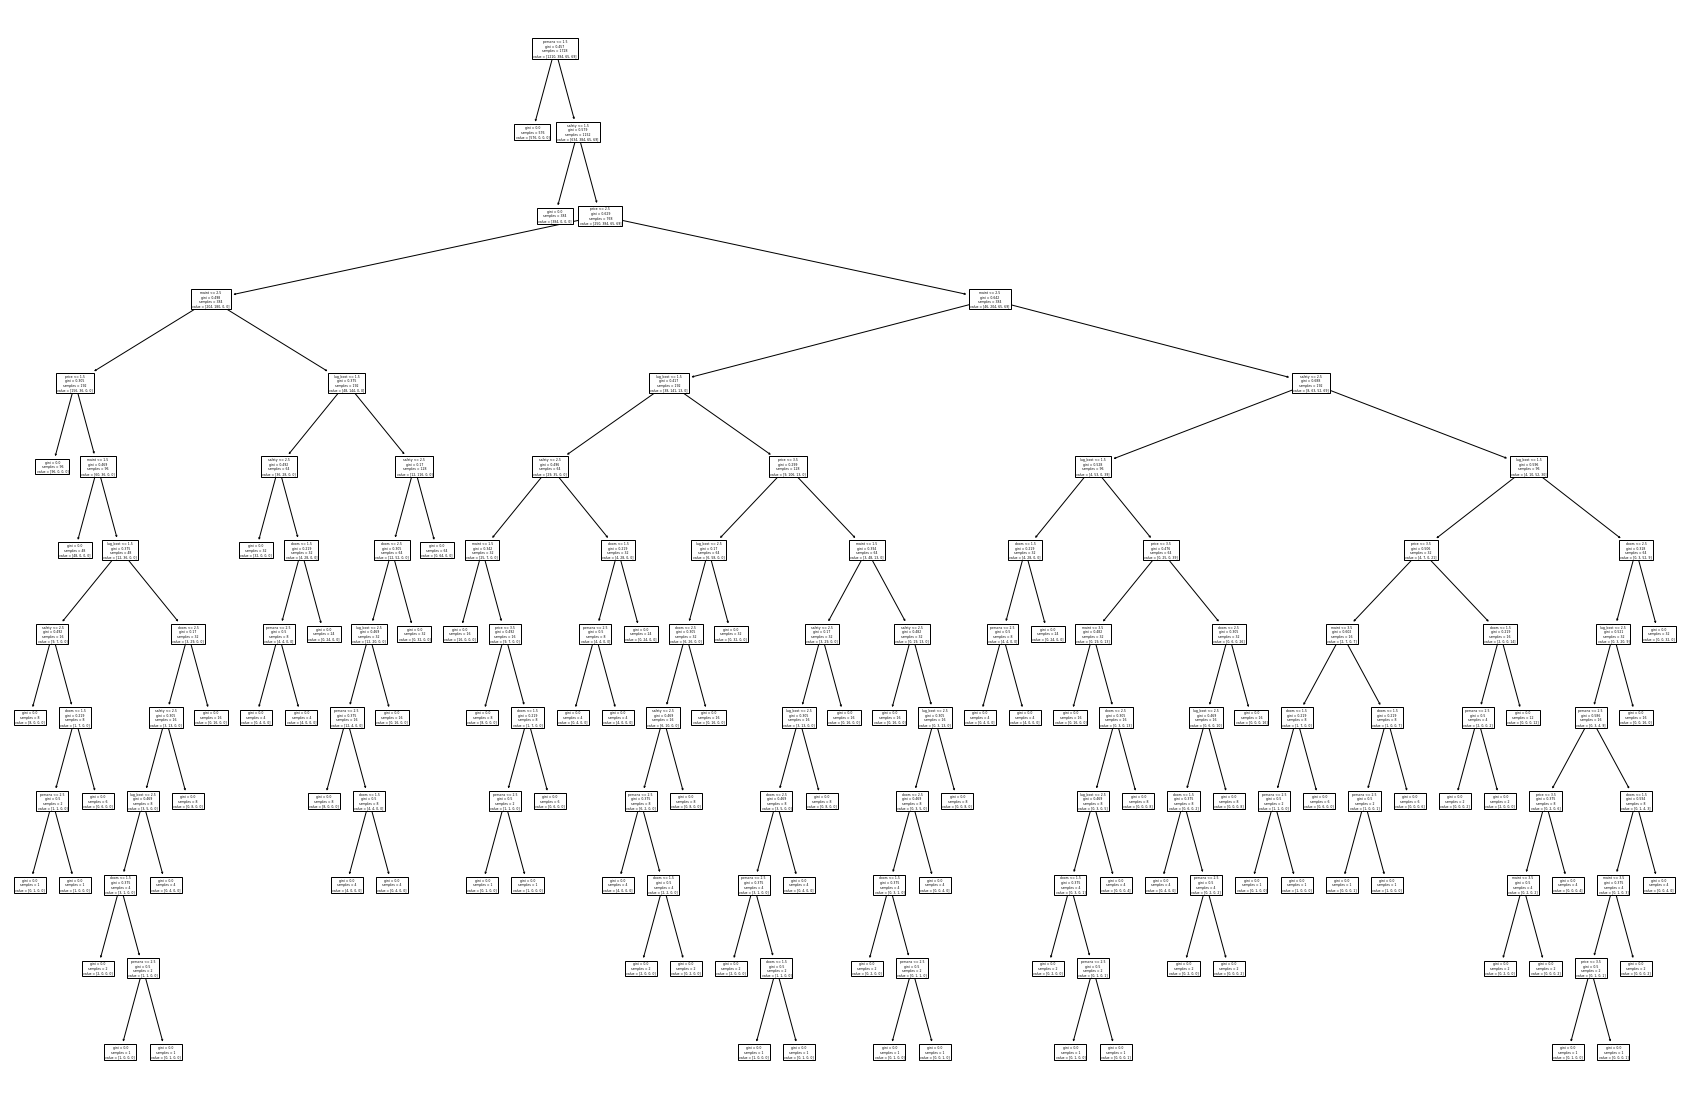

In [ ]:

from sklearn.tree import plot_tree

plt.figure(figsize=(30,20))

plot_tree(tree,feature_names=['price', 'maint','doors','persons','lug_boot','safety']);


#### **Confiusion Matrix**

In [ ]:
df.target.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: target, dtype: int64

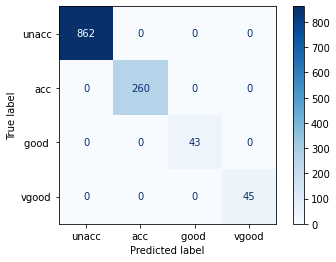

In [ ]:
plot_confusion_matrix(tree, x_test, y_test, display_labels=['unacc', 'acc' ,'good ','vgood'],values_format='', cmap='Blues');

#### **GridSearchCV**

In [ ]:
p_grid = {'criterion': ['gini','entropy'],
          'splitter' : ['best', 'random'],
         'max_depth':[5],
          'random_state':[42]

}

grid = GridSearchCV(tree, p_grid, cv=7)
grid.fit(x_train, y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5],
 

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'random_state': 42,
 'splitter': 'best'}

####**Decision Tree before GridSearchcv**

In [ ]:
tree = DecisionTreeClassifier(criterion= 'entropy', splitter= 'best', max_depth= 5,random_state= 42)
tree.fit(x_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
preds = tree.predict(x_test)

##### **Accuracy after GridSearchCV**

In [ ]:
accuracy_score(y_test , preds)

0.8776859504132232

##### **Confusion matrix after GridSearchCV**

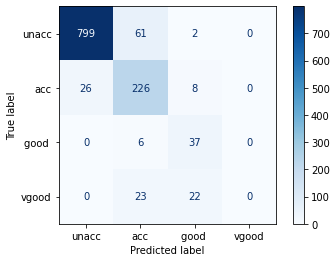

In [ ]:
plot_confusion_matrix(tree, x_test, y_test, display_labels=['unacc', 'acc' ,'good ','vgood'],values_format='', cmap='Blues');

#### **Decision Tree with GridsearchCV**

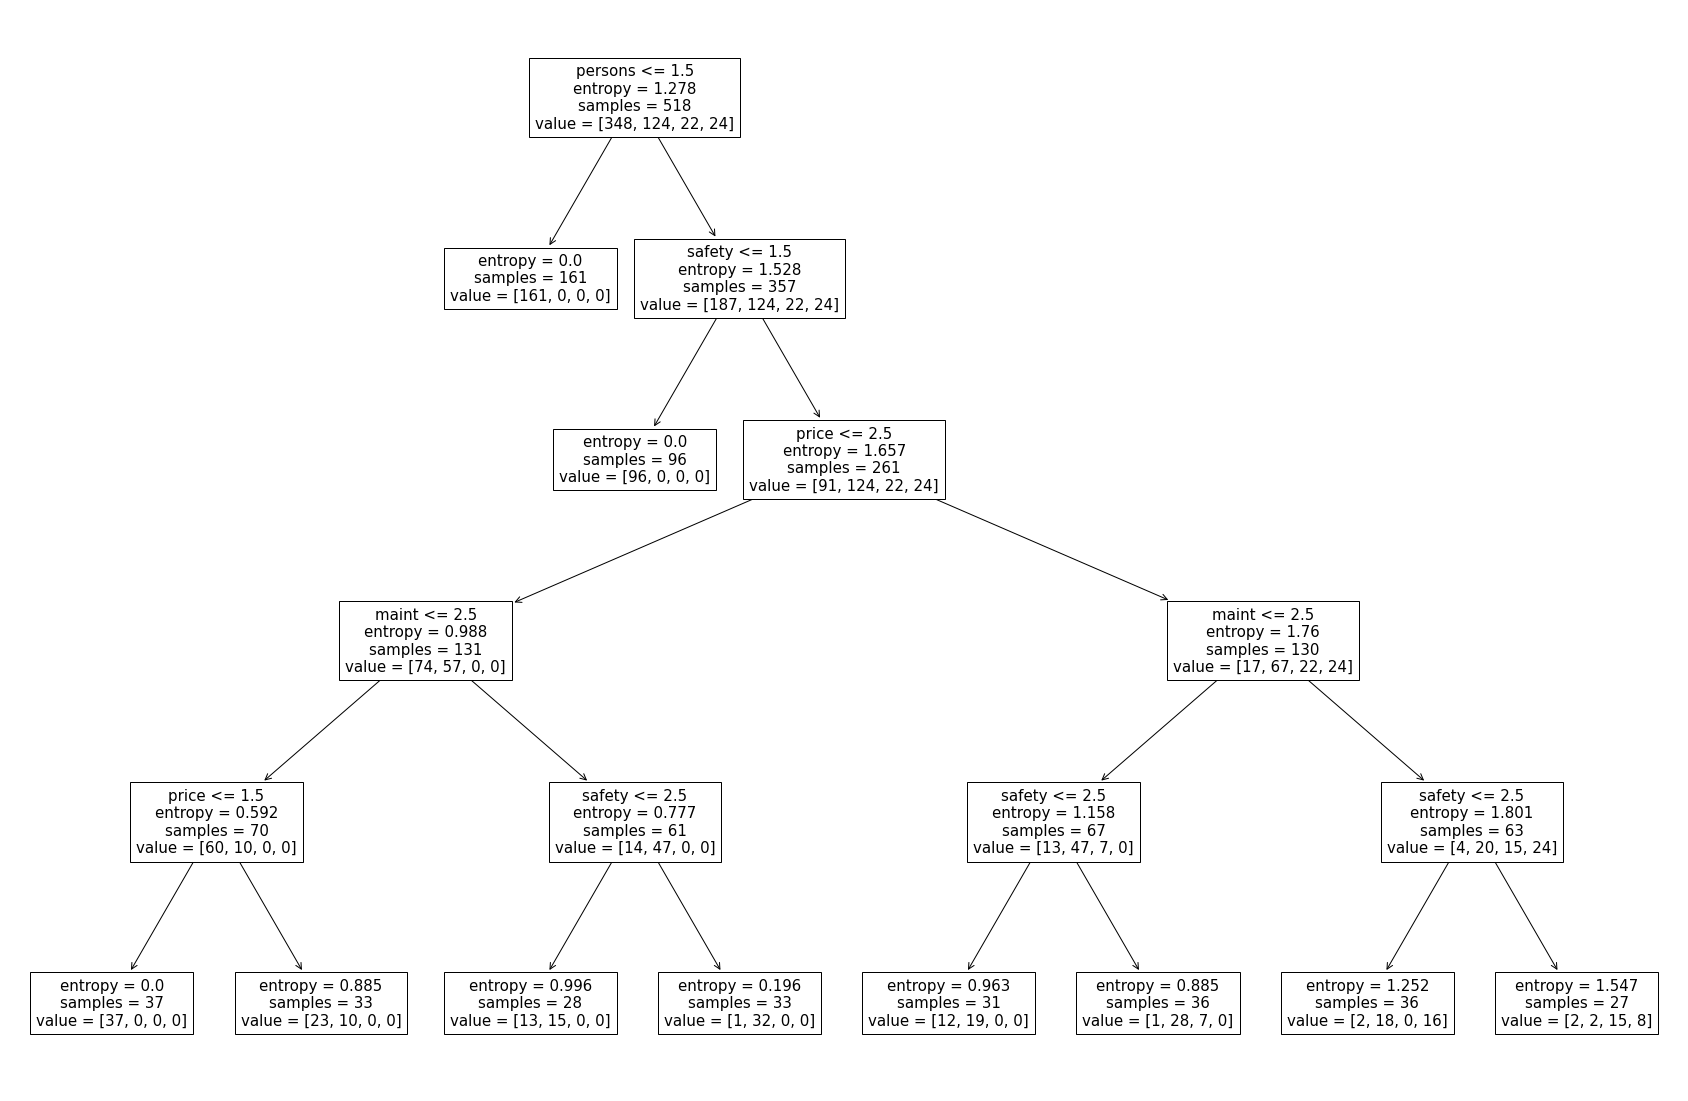

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,20))

plot_tree(tree,feature_names=['price', 'maint','doors','persons','lug_boot','safety']);


###**Random Forest Model**

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)


In [ ]:
# fit the model
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predict the Test set results

y_pred = rfc.predict(x_test)

###**Accurecy**

In [ ]:
accuracy_score(y_test, y_pred)

0.959504132231405